In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
import time

## 1. Introduction
NASA HI-SEAS missions act as a testbed and training ground for humans as we develop the capability to explore Mars. A recent NASA Space Apps Challenge hackathon asked participants to use data collected from the HI-SEAS site to predict solar radiation given a set of measurable meteorological conditions. Knowing when conditions are most favorable for incident solar radiation is crucial for deciding when and where to deploy solar energy harvesting equipment, especially for colonists or astronauts on the surface of Mars.

The original Kaggle dataset & competition can be found here: https://www.kaggle.com/dronio/SolarEnergy

## 1.2. About this dataset
These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016) between Mission IV and Mission V.

For each dataset, the fields are:

A row number (1-n) is useful in sorting this export's results The UNIX time_t date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results The date in yyyy-mm-dd format The local time of day in hh:mm:ss 24-hour format The numeric data, if any (may be an empty string) The text data, if any (may be an empty string)

The units of each dataset are:

* Solar radiation: watts per meter^2
* Temperature: degrees Fahrenheit
* Humidity: percent
* Barometric pressure: Hg
* Wind direction: degrees
* Wind speed: miles per hour
* Sunrise/sunset: Hawaii time

In [2]:
solar=pd.read_csv('C:\\Users\\vikas\\Downloads\\Great Learning\\Capestone Project\\SolarPrediction.csv')
solar.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
pd.set_option('display.max_rows',143)
pd.set_option('display.max_columns',143)

In [4]:
#Covert time to_datetime

#Adding a new column 'Total Radiation Time'
solar['Total_radiation_time'] = pd.to_datetime(solar['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(solar['TimeSunRise'], format='%H:%M:%S').dt.hour
solar.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Total_radiation_time
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,12
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,12
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,12
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,12
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,12


# Data Preprocessing

In [5]:
solar.shape

(32686, 12)

In [6]:
solar.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet', 'Total_radiation_time'],
      dtype='object')

In [7]:
solar.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
Total_radiation_time        int64
dtype: object

In [8]:
#solar['Time']=solar['Time'].str.replace(':','')
#solar['Time'] = solar['Time'].astype(int)

In [9]:
solar.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Total_radiation_time
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,12
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,12
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,12
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,12
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,12


In [10]:
solar.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
Total_radiation_time      0
dtype: int64

In [11]:
# Dropping the UNIX Time column
solar = solar.drop(['UNIXTime'],axis=1)

In [12]:
# Removing the AM format from Data.
solar['Data'] = solar['Data'].apply(lambda x: dt.strptime(x, '%m/%d/%Y %H:%M:%S %p').strftime('%m/%d/%Y %H:%M:%S'))
solar.head()

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Total_radiation_time
0,09/29/2016 12:00:00,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,12
1,09/29/2016 12:00:00,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,12
2,09/29/2016 12:00:00,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,12
3,09/29/2016 12:00:00,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,12
4,09/29/2016 12:00:00,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,12


In [13]:
# Splitting the Date & Time into different Columns.
all_dates = []
def get_dates_all(date):
    date = dt.strptime(date, '%m/%d/%Y %H:%M:%S')
    return {
        'Year': date.year,
        'Month': date.month,
        'Date': date.day,
        'Hour': date.hour,
        'Minute': date.minute,
        'WeekOfYear': date.isocalendar()[1],
        'DayOfWeek': date.isocalendar()[2]
    }
    
for date in solar.Data:
    all_dates.append(get_dates_all(date))

In [14]:
# Splitting the time into Hours , Minutes & Seconds
day_time=[]
def all_time(time):
    time = dt.strptime(time ,'%H:%M:%S')
    return {
        'Hours': time.hour,
        'Minutes': time.minute
    }
for time in solar.Time:
    day_time.append(all_time(time))
    

In [15]:
# Concatinating the Splitted date & time with the original dataframe.
solar1=pd.concat([pd.DataFrame(all_dates),solar,pd.DataFrame(day_time)],axis=1)
solar1.head()

,Year,Month,Date,Hour,Minute,WeekOfYear,DayOfWeek,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Total_radiation_time,Hours,Minutes
0,2016,9,29,12,0,39,4,09/29/2016 12:00:00,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,12,23,55
1,2016,9,29,12,0,39,4,09/29/2016 12:00:00,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,12,23,50
2,2016,9,29,12,0,39,4,09/29/2016 12:00:00,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,12,23,45
3,2016,9,29,12,0,39,4,09/29/2016 12:00:00,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,12,23,40
4,2016,9,29,12,0,39,4,09/29/2016 12:00:00,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,12,23,35


In [16]:
solar1 = solar1.drop(['Data','Minute','Hour'], axis=1)

In [17]:
correlations = solar1.corr().sort_values(by='Radiation', ascending=False)['Radiation']

In [18]:
correlations

Radiation                 1.000000
Temperature               0.734955
Pressure                  0.119016
Speed                     0.073627
Total_radiation_time      0.048719
Date                      0.039978
Hours                     0.004398
Minutes                  -0.000730
DayOfWeek                -0.031232
WeekOfYear               -0.079478
Month                    -0.095450
Humidity                 -0.226171
WindDirection(Degrees)   -0.230324
Year                           NaN
Name: Radiation, dtype: float64

In [19]:
describe = solar1.describe().T
describe

,count,mean,std,min,25%,50%,75%,max
Year,32686.0,2016.000000,0.000000,2016.00,2016.0000,2016.00,2016.000,2016.00
Month,32686.0,10.526066,1.096691,9.00,10.0000,11.00,11.000,12.00
Date,32686.0,15.825766,8.711824,1.00,9.0000,16.00,23.000,31.00
WeekOfYear,32686.0,43.722848,4.970441,35.00,40.0000,44.00,48.000,52.00
DayOfWeek,32686.0,4.051031,2.021749,1.00,2.0000,4.00,6.000,7.00
Radiation,32686.0,207.124697,315.916387,1.11,1.2300,2.66,354.235,1601.26
Temperature,32686.0,51.103255,6.201157,34.00,46.0000,50.00,55.000,71.00
Pressure,32686.0,30.422879,0.054673,30.19,30.4000,30.43,30.460,30.56
Humidity,32686.0,75.016307,25.990219,8.00,56.0000,85.00,97.000,103.00
WindDirection(Degrees),32686.0,143.489821,83.167500,0.09,82.2275,147.70,179.310,359.95


## Univariate Analysis


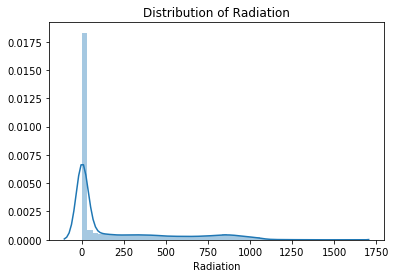

In [20]:
# Radiation
sns.distplot(solar1['Radiation'])
plt.title('Distribution of Radiation')
plt.show()


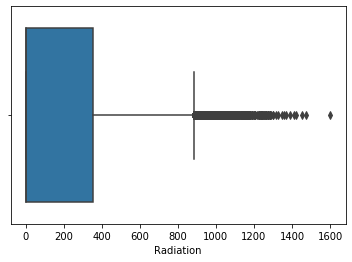

In [21]:
sns.boxplot(solar1['Radiation'])
plt.show()
# Inference : 

##### Inference : 
* The distribution is right skewed which means that radiation is very high when it is ranging b/w 1-100. 
* There are outliers in the Radiation and it needs to be transformed.

In [22]:
# Number of Outliers in the Radiation column
q1 = solar1['Radiation'].quantile(0.25)
q3 = solar1['Radiation'].quantile(0.75)
iqr = q3-q1
ub = q3 + 1.5 * iqr
lb = q1 - 1.5 * iqr
out = solar1[(solar1['Radiation'] > ub) |  (solar1['Radiation'] < lb)].shape[0]
print('The median for Radiation ', solar1['Radiation'].median())
print('IQR is : ', iqr)
print('Upper Boundary is : ', ub)
print('Lower boundary is : ', lb)
print('The number of outliers in Radiation is : ', out)


The median for Radiation  2.66
IQR is :  353.005
Upper Boundary is :  883.7425
Lower boundary is :  -528.2774999999999
The number of outliers in Radiation is :  1965


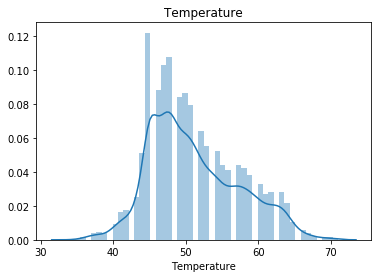

In [23]:
# Temperature
sns.distplot(solar1['Temperature'])
plt.title('Temperature')
plt.show()

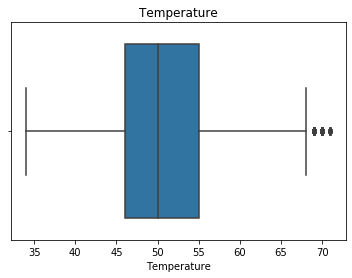

In [24]:
sns.boxplot(solar1['Temperature'])
plt.title('Temperature')
plt.show()


###### Inference : 
*  The Temperature is somewhat normally but it needs to be scaled up and mostly the 40-50 which 
*  There are outliers in the upper region of the boxplot.
*  The IQR region is ranging between 45-55.


In [25]:
# Number of outliers in the Temperature column
q1 = solar1['Temperature'].quantile(0.25)
q3 = solar1['Temperature'].quantile(0.75)
iqr = q3 - q1
ub = q3 + 1.5 * iqr
lb = q1 - 1.5 * iqr 
out = solar1[(solar1['Temperature'] > ub) | (solar1['Temperature'] < lb)].shape[0]
print('The median for Temperature is : ', solar['Temperature'].median())
print('IQR is : ', iqr)
print('Lower boundary is : ', lb)
print('Upper boundary is :', ub)
print( 'The number of outliers in the Temperature is :', out)

The median for Temperature is :  50.0
IQR is :  9.0
Lower boundary is :  32.5
Upper boundary is : 68.5
The number of outliers in the Temperature is : 89


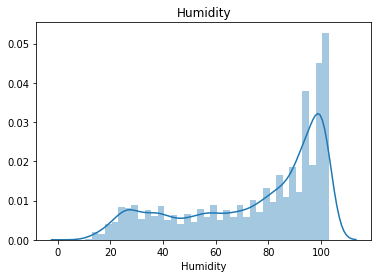

In [26]:
# Humidity
sns.distplot(solar1['Humidity'])
plt.title('Humidity')
plt.show()
# Inference : distribution  is Left skewed.

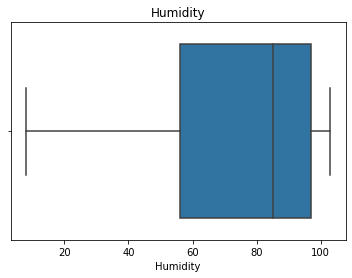

In [27]:
sns.boxplot(solar1['Humidity'])
plt.title('Humidity')
plt.show()


###### Inference :

* The lower boundary for Humidity is stretched while the inter quartlie range lies between 57 -97 (approx). 
* The median lies above above 80.
* The upper boundary lies above 100.
* There are no Outliers in the Humidity column.

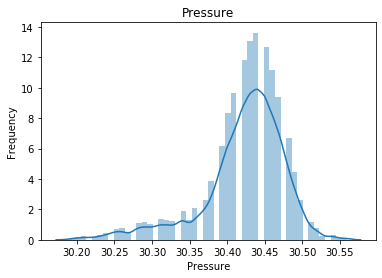

In [28]:
# Pressure
sns.distplot(solar1['Pressure'])
plt.title('Pressure')
plt.ylabel('Frequency')
plt.show()
 

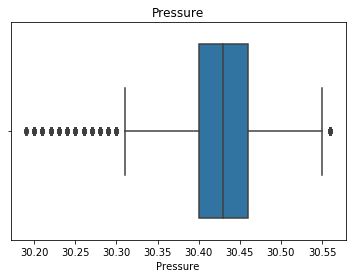

In [29]:
sns.boxplot(solar1['Pressure'])
plt.title('Pressure')
plt.show()
# Inference: 


##### Inference : 
* Pressure column is left skewed and the presure is ranging between 30.20 to 30 .55 hg.
* There are outliers  in the upper and lower whisker of theboxplot.
* The median is ranged between 30.40 to 30.45.

In [30]:
# Number of outliers in Pressure
q1 = solar1['Pressure'].quantile(0.25)
q3 = solar1['Pressure'].quantile(0.75)
iqr = q3 - q1
ub = q3 + 1.5 * iqr
lb = q1 - 1.5 * iqr 
#out = solar1[(solar1['Pressure'] < ub) & (solar1['Pressure'] < lb)].shape[0]
out1 = solar1[(solar1['Pressure'] > ub) | (solar1['Pressure'] < lb)].shape[0]
print('The median for Pressure : ', solar1['Pressure'].median())
print('IQR is : ', iqr)
print('Lower boundary is : ', lb)
print('Upper boundary is :', ub)
print( 'The number of outliers in the Pressure is :', out1 )

The median for Pressure :  30.43
IQR is :  0.060000000000002274
Lower boundary is :  30.309999999999995
Upper boundary is : 30.550000000000004
The number of outliers in the Pressure is : 1662


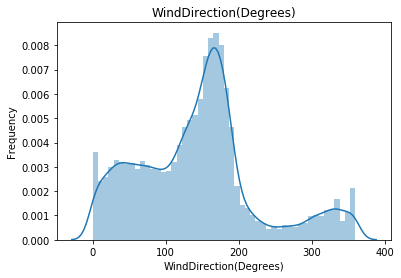

In [31]:
#WindDirection(Degrees)
sns.distplot(solar1['WindDirection(Degrees)'],kde=True)
plt.title('WindDirection(Degrees)')
plt.ylabel('Frequency')
plt.show()


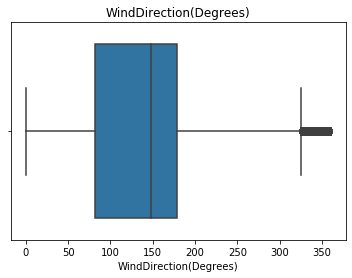

In [32]:
sns.boxplot(solar1['WindDirection(Degrees)'])
plt.title('WindDirection(Degrees)')
plt.show()
# Inference : 


##### Inference : 
* We can see that WindDirection(Degrees) has majority of data points between 100-200.
* There is a possibility of clustering.
* There are outliers in the upper whisker of the boxplot and upper boundary is strecthed
* The median is at 150. 
* The IQR is ranging b/w 70 to 180 (approx).

In [33]:
# Number of outliers in Wind direction
q1 = solar1['WindDirection(Degrees)'].quantile(0.25)
q3 = solar1['WindDirection(Degrees)'].quantile(0.75)
iqr = q3 - q1
ub = q3 + 1.5 * iqr
lb = q1 - 1.5 * iqr 
out = solar1[(solar1['WindDirection(Degrees)'] > ub) | (solar1['WindDirection(Degrees)'] < lb)].shape[0]
print('The median for Wind Direction is : ' , solar1['WindDirection(Degrees)'].median())
print('IQR is : ', iqr)
print('Lower boundary is : ', lb)
print('Upper boundary is :', ub)
print( 'The number of outliers in the WindDirection(Degrees) is :', out)

The median for Wind Direction is :  147.7
IQR is :  97.08250000000001
Lower boundary is :  -63.39625000000004
Upper boundary is : 324.93375000000003
The number of outliers in the WindDirection(Degrees) is : 1618


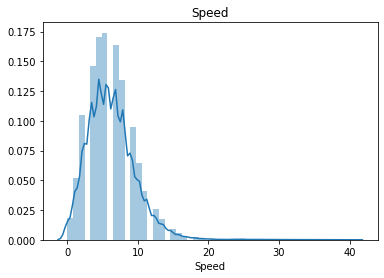

In [34]:
# Speed
sns.distplot(solar1['Speed'])
plt.title('Speed')
plt.show()
  

##### Inference : 
* speed column is right skewed which means that majority of speed is ranging b/w 1-18 mph which is normal.

# Bivariate Analysis

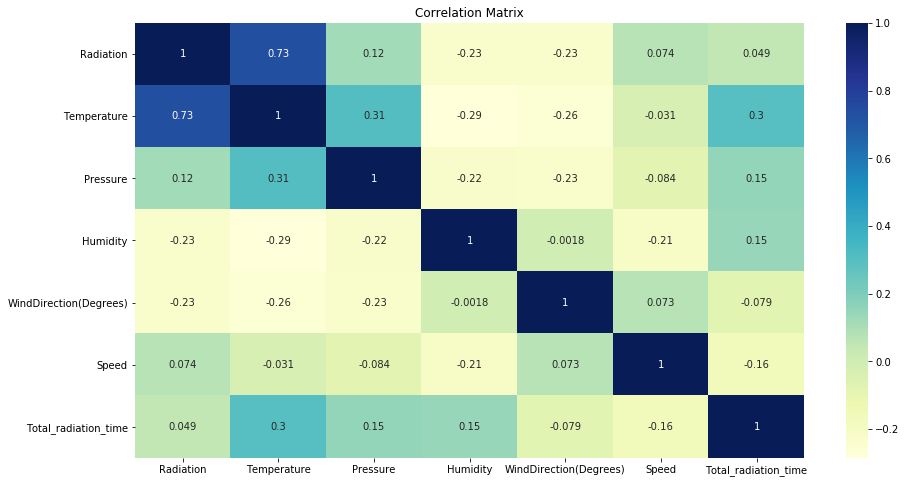

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(solar.corr(),annot=True,cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()


#### Inference : 
* From this heatmap we, can see that temperature and radiation has highest postive correlation of 0.73.
* There is positive correlation between Temperature And Pressure of 0.31.

In [36]:
# Dummies Data

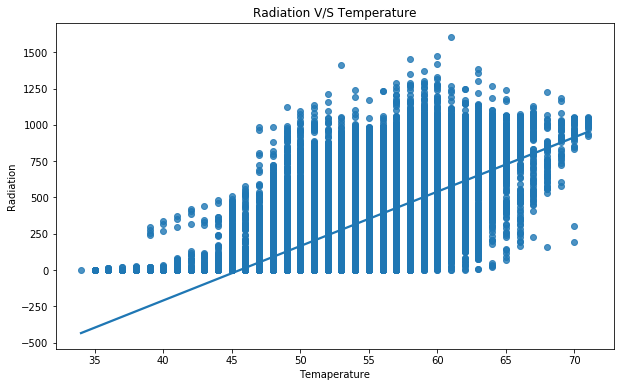

In [37]:
# Radiation V/S Temperature
plt.figure(figsize=(10,6))
sns.regplot(solar1['Temperature'],solar1['Radiation'])
plt.title('Radiation V/S Temperature')
plt.xlabel('Temaperature')
plt.ylabel('Radiation')
plt.show()
  

##### Inference :
* With the increase  in  Temperature, Radiation is also increasing.
* The Best fit line is showing the positive linear relation between the variables.

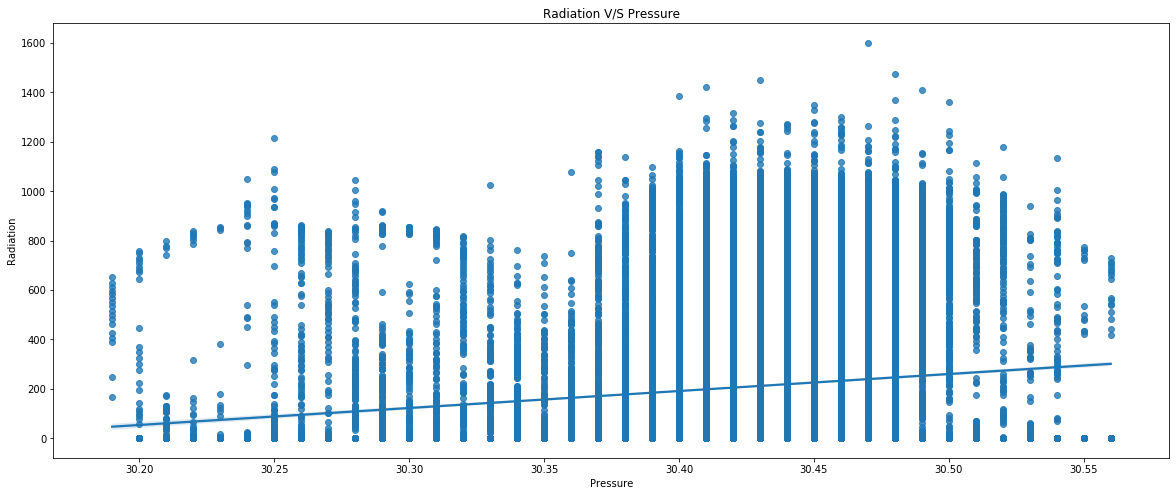

In [38]:
# Radiation V/S Pressure
plt.figure(figsize=(20,8))
sns.regplot(solar1['Pressure'],solar1['Radiation'])
plt.title('Radiation V/S Pressure')
plt.xlabel('Pressure')
plt.ylabel('Radiation')
plt.show()



##### Inference : 
* There is a positive linear relation among the variables.

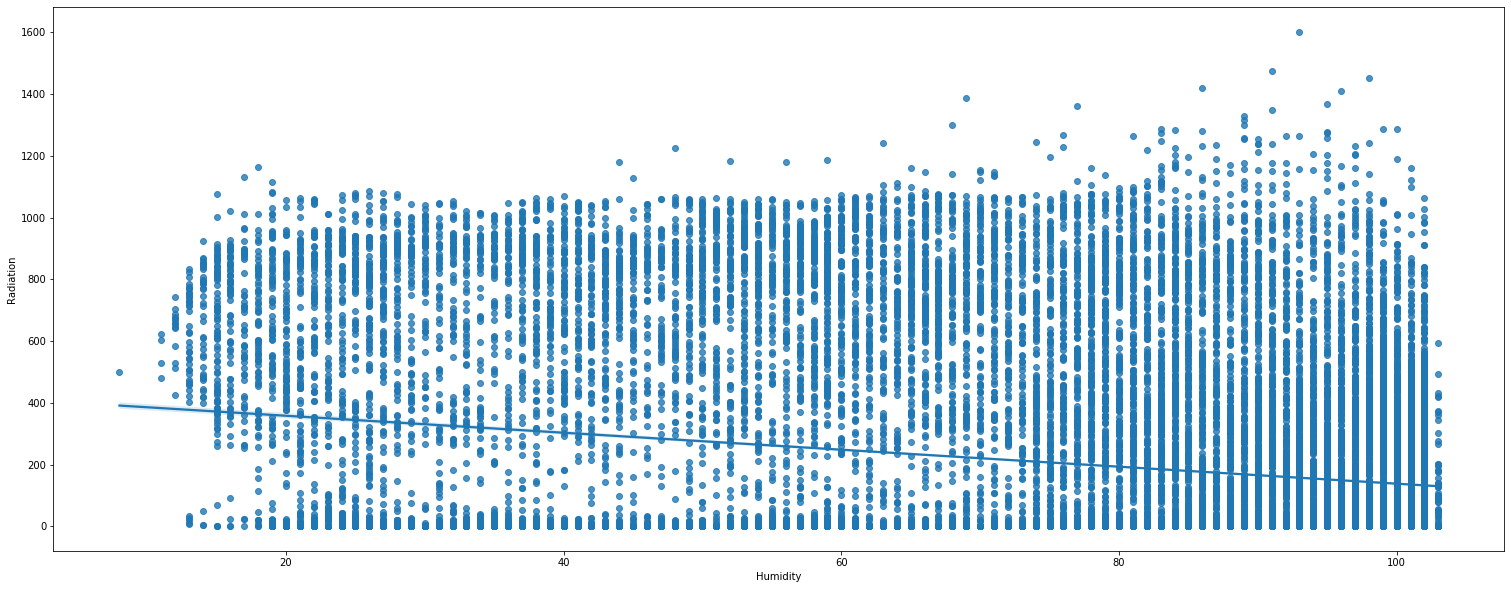

In [39]:
# Radiation V/S Humidity
plt.figure(figsize=(26,10))
sns.regplot(solar1['Humidity'],solar1['Radiation'])
plt.xlabel('Humidity')
plt.ylabel('Radiation')
plt.show()


###### Inference : 
* There is negative relationship between Humidity and Radiation which means lower the Humidity higher is the Radiation.

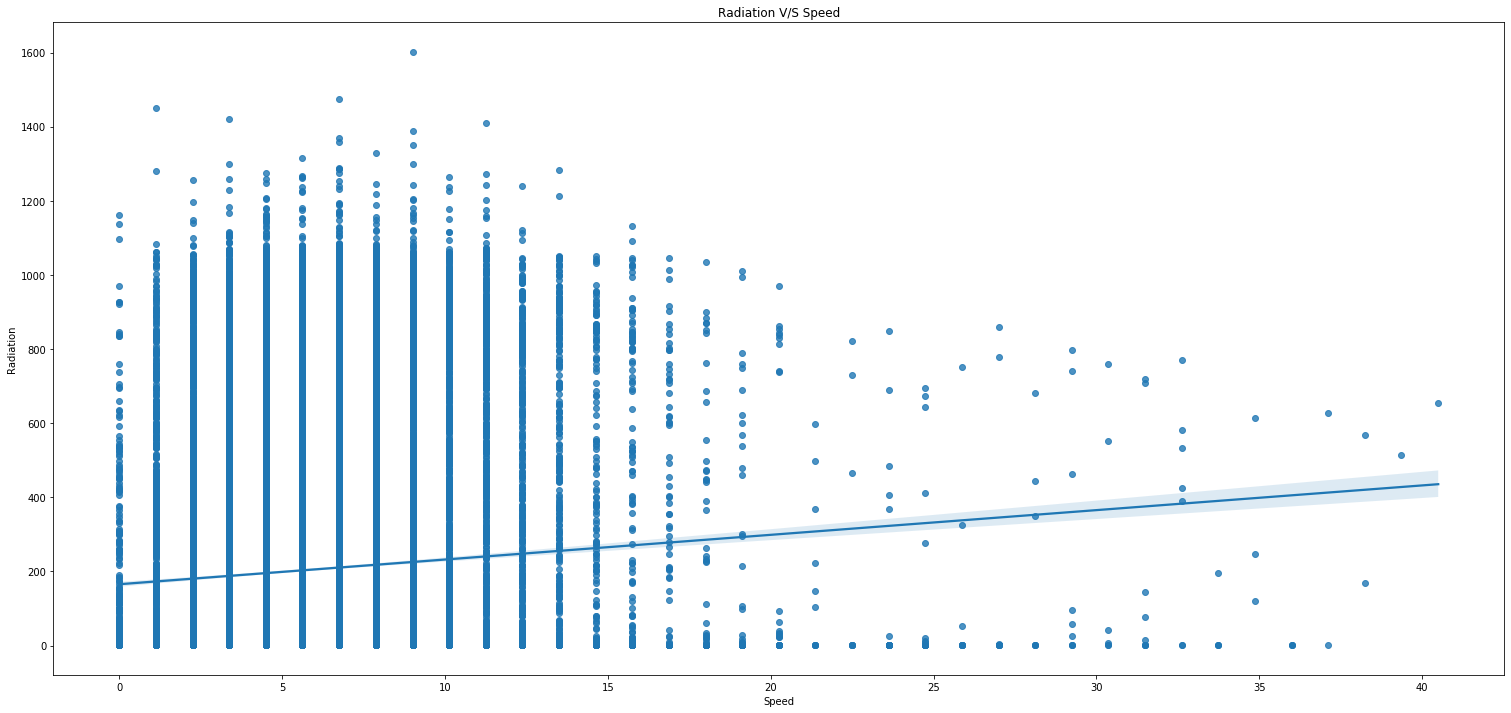

In [40]:
# Radiation V/S Speed
plt.figure(figsize=(26,12))
sns.regplot(solar1['Speed'],solar1['Radiation'])
plt.title('Radiation V/S Speed')
plt.xlabel('Speed')
plt.ylabel('Radiation')
plt.show()


##### Inference : 
* There is positive linear relation among the variables.
* Higher is the Speed, Higher is the Radiation.

In [41]:
solar1.head()

,Year,Month,Date,WeekOfYear,DayOfWeek,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Total_radiation_time,Hours,Minutes
0,2016,9,29,39,4,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,12,23,55
1,2016,9,29,39,4,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,12,23,50
2,2016,9,29,39,4,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,12,23,45
3,2016,9,29,39,4,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,12,23,40
4,2016,9,29,39,4,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,12,23,35


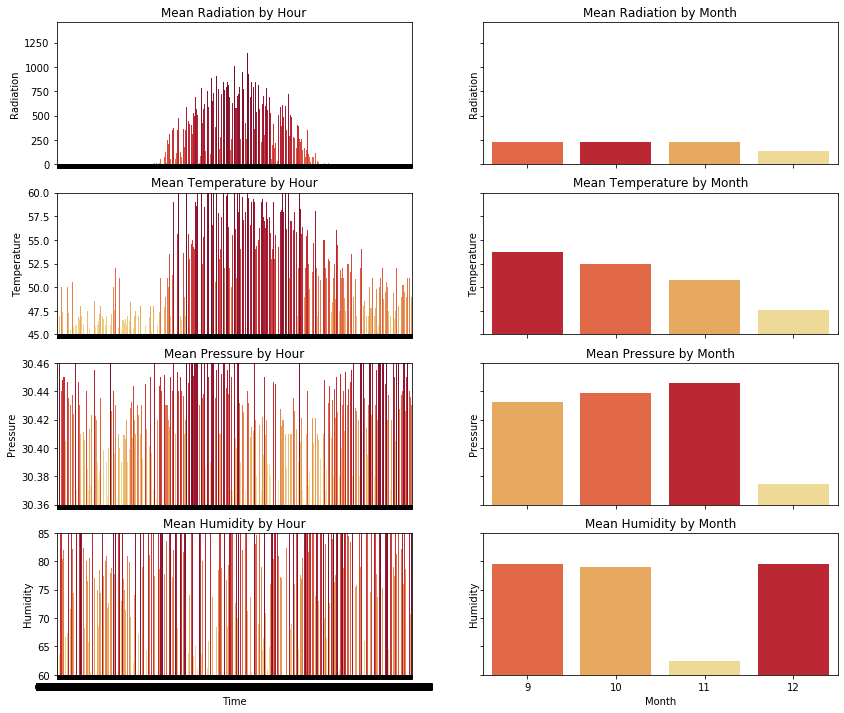

In [42]:
# Mean Radiation
grouped_m=solar1.groupby('Month').mean().reset_index()
grouped_w=solar1.groupby('WeekOfYear').mean().reset_index()
grouped_d=solar1.groupby('DayOfWeek').mean().reset_index()
grouped_h=solar1.groupby('Time').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
ax3.set_ylim(45,60)
ax5.set_ylim(30.36,30.46)
ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Radiation'].argsort().argsort() 
g = sns.barplot(x="Time", y='Radiation', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Radiation'].argsort().argsort() 
g = sns.barplot(x="Month", y='Radiation', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort() 
g = sns.barplot(x="Time", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort() 
g = sns.barplot(x="Month", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="Time", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x="Month", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort() 
g = sns.barplot(x="Time", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort() 
g = sns.barplot(x="Month", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

In [43]:
# Dropping The Time column
solar1 = solar1.drop(['Time'],axis = 1)

# Multivariate Analysis

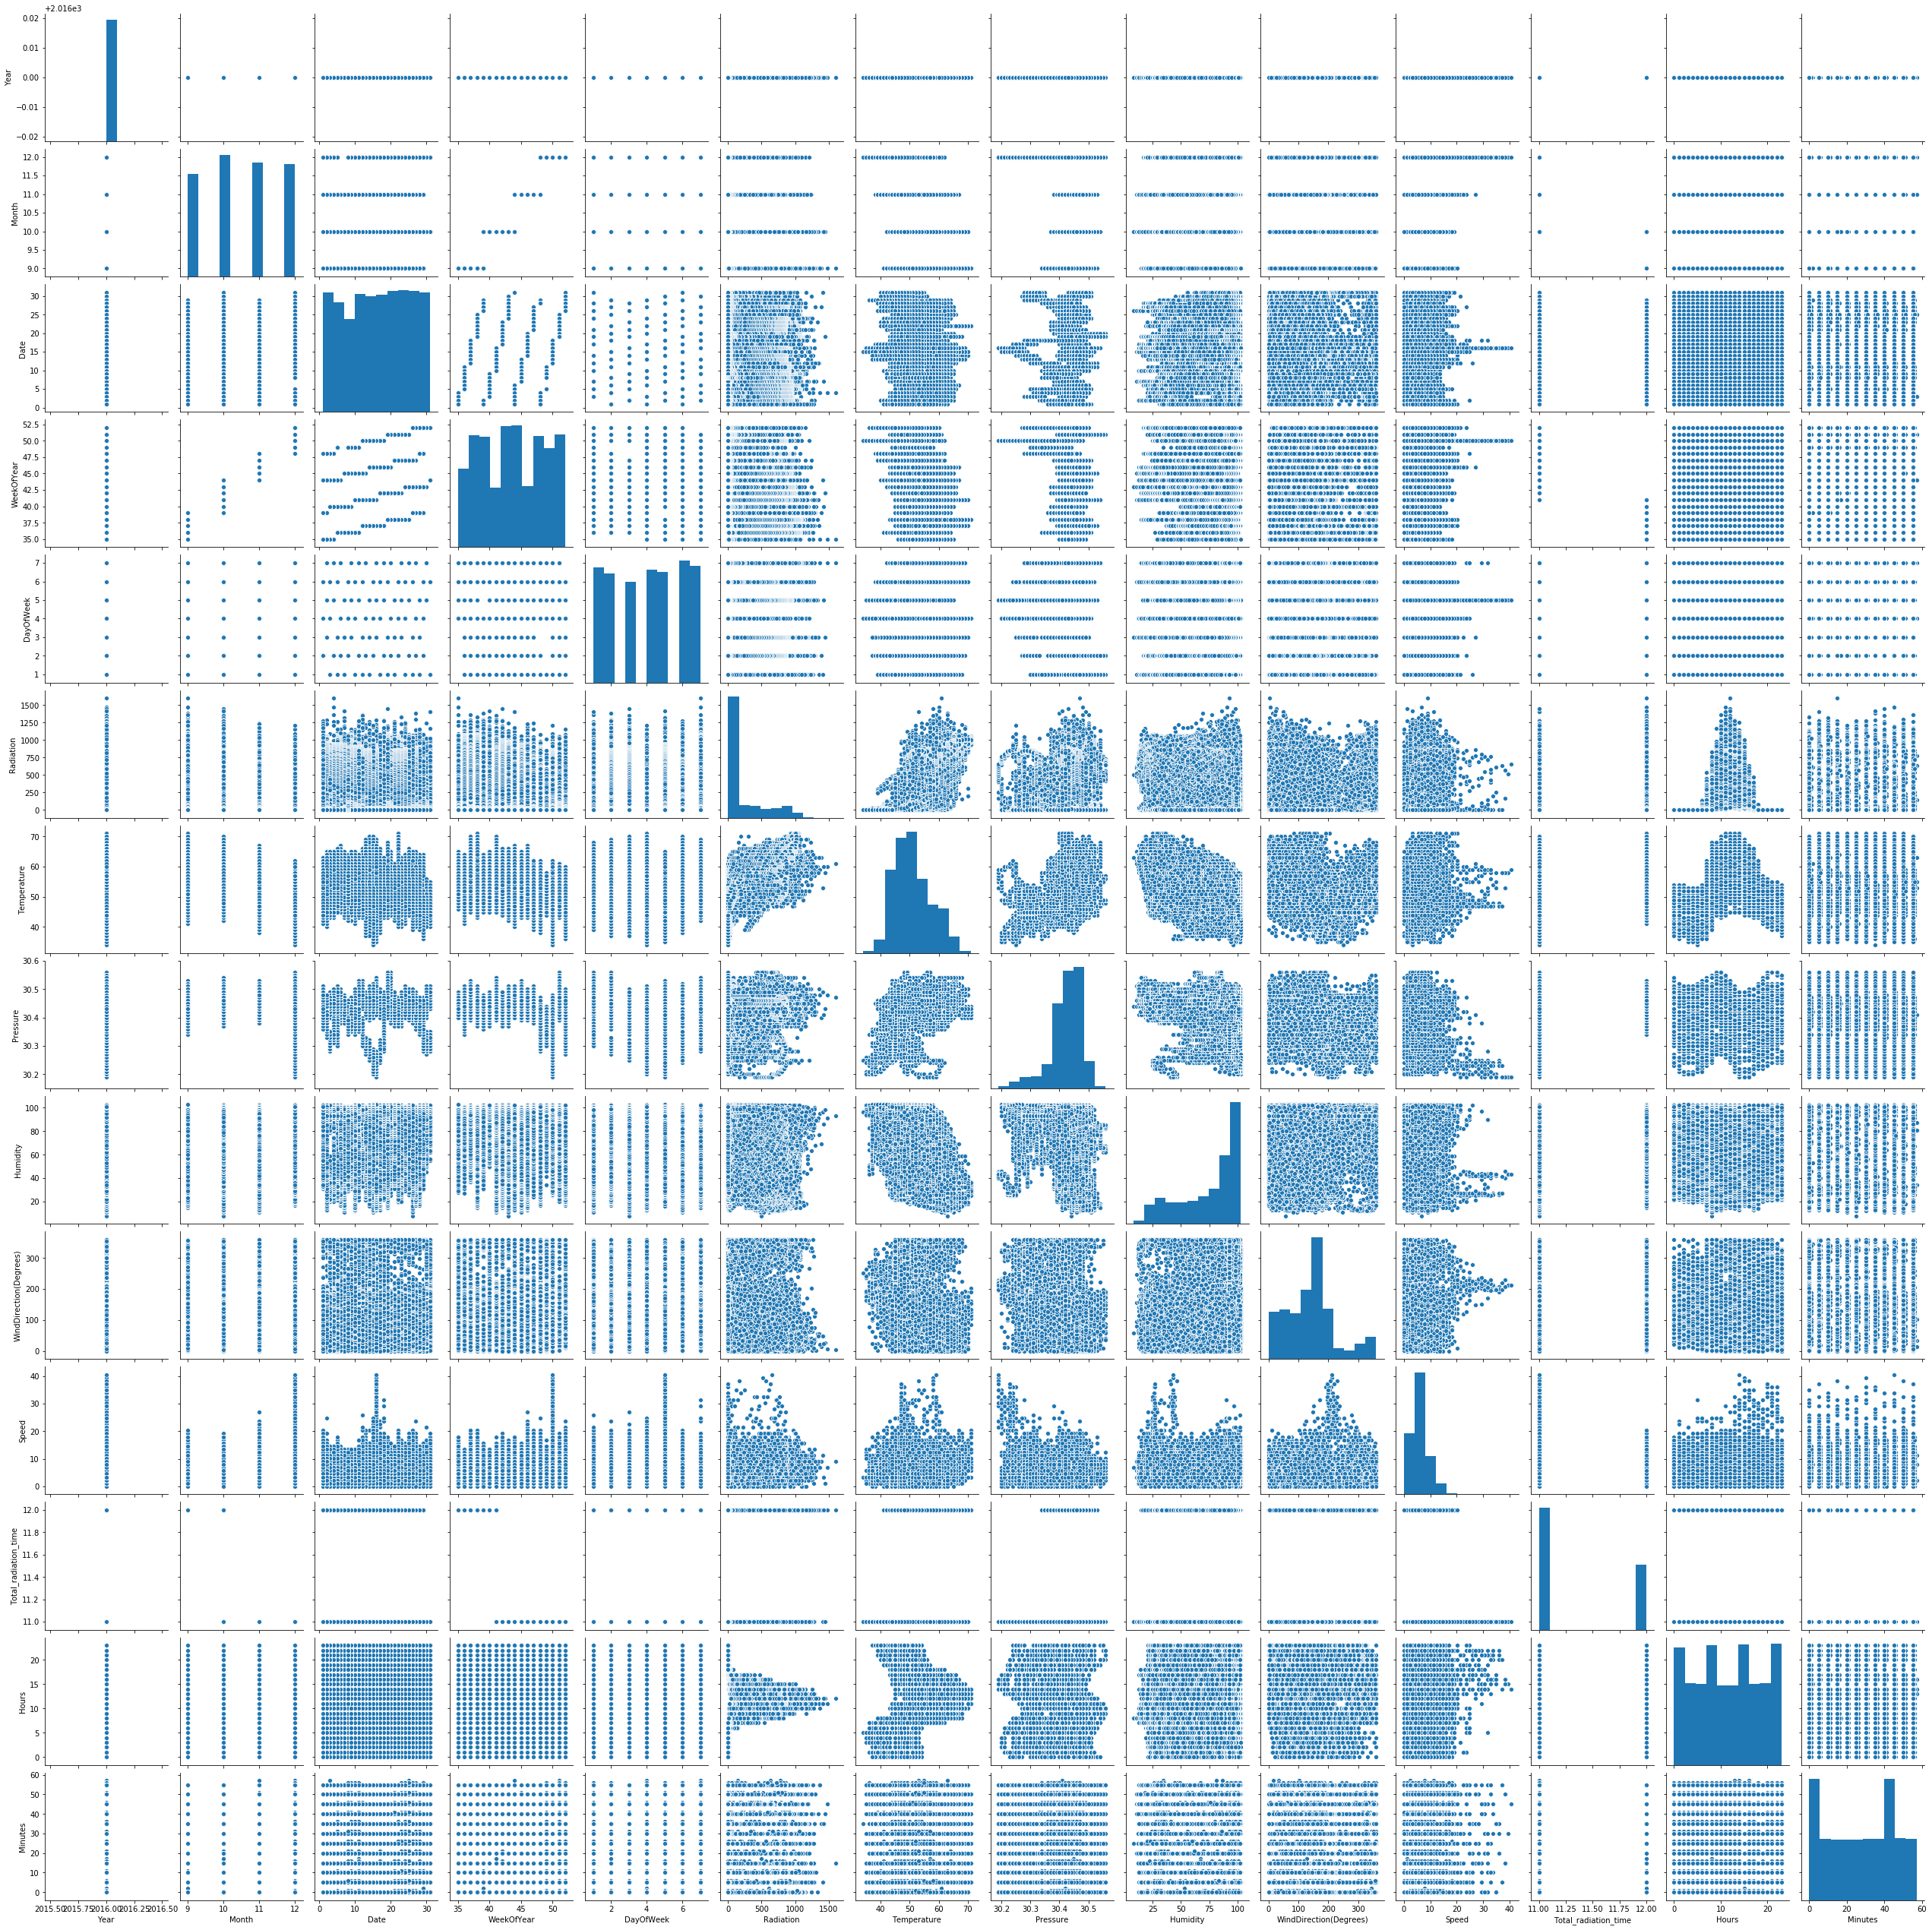

In [44]:
# Pairplot of the dataset.
sns.pairplot(solar1)
plt.show()


###### Inference : 
* There is no such major  Linear Relationship among independent variable.

# Treatment of Outliers

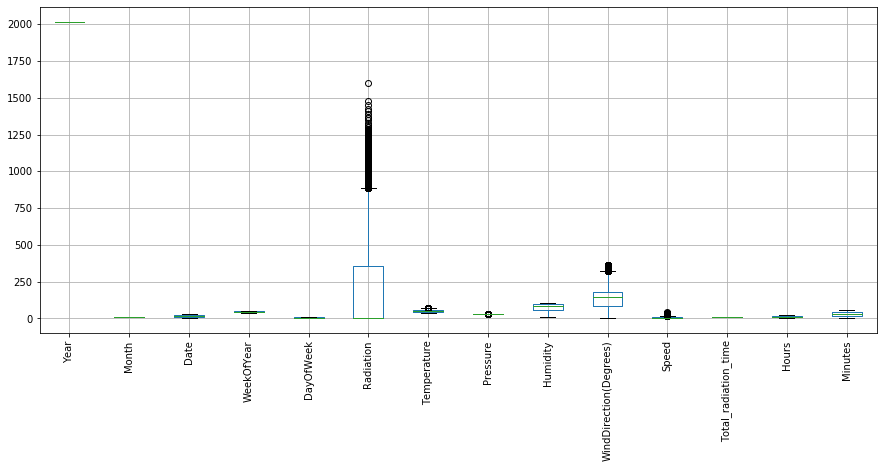

In [45]:
# Detecting outliers in the entire dataset
plt.figure(figsize=(15,6))
solar1.boxplot()
plt.xticks(rotation='vertical')
plt.show()



##### Inference : 
* Radiation has maxmimum number of outliers and their are outliers in Wind Direction , Speed , Pressure & Temperature.

In [46]:
# Treatement of Ouliers
# Log Tranformation of Radiation column
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p)
solar1['Radiation_log'] = log_transformer.fit_transform(solar1['Radiation'])
solar1['Radiation_log']

0        0.792993
1        0.792993
2        0.802002
3        0.792993
4        0.774727
           ...   
32681    0.797507
32682    0.774727
32683    0.788457
32684    0.802002
32685    0.788457
Name: Radiation_log, Length: 32686, dtype: float64

In [47]:
# Dropping Radiation column from the data.
solar1 = solar1.drop(['Radiation'],axis=1)

In [48]:
# Outlier Treatment
def treat_outliers(df: pd.DataFrame, column_name: str):
    """
    This function removes and returns the outliers from both
    extremes and replaces them with q1 or q3 values    
    """
    
    q1, q3 = df[column_name].quantile([0.25, 0.75]).values
    iqr = q3 - q1

    lower = df[df[column_name] < (q1 - (1.5 * iqr))]
    upper = df[df[column_name] > (q3 + (1.5 * iqr))]

    df.loc[list(lower.index), column_name] = q1  # Change this to replace with min
    df.loc[list(upper.index), column_name] = q3  # Change this to replace with max

    return df

In [49]:
solar2 = treat_outliers(solar1, ['Temperature','Pressure','Speed','WindDirection(Degrees)'])


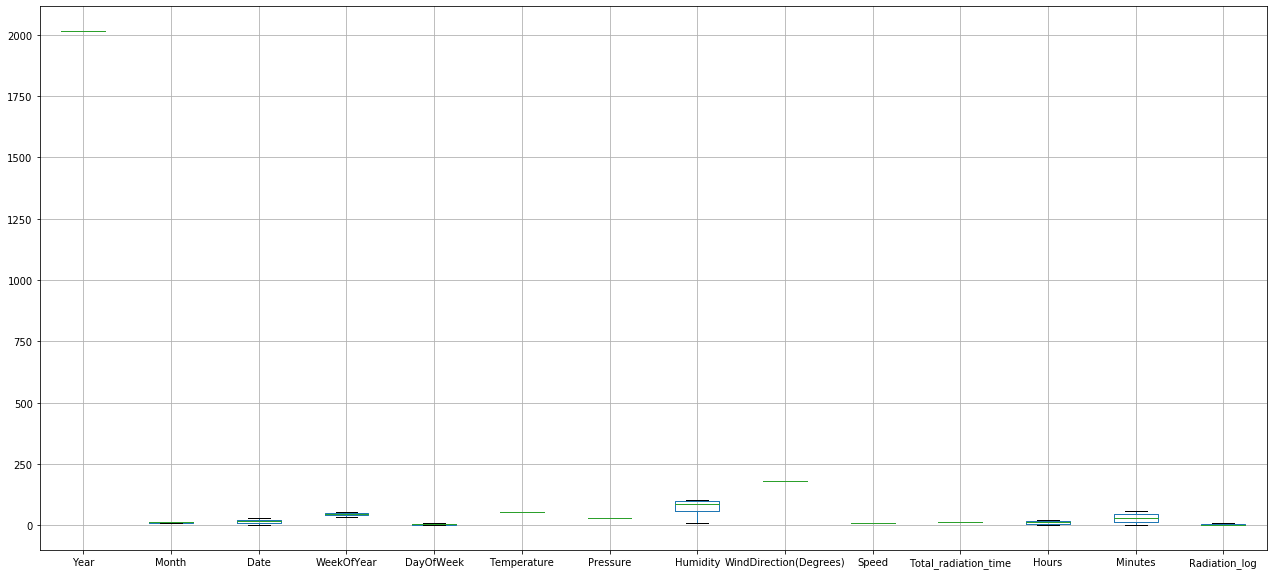

In [50]:
# Examining visually whether the outliers have been removed or not.
plt.figure(figsize = (22,10))
solar2.boxplot()
plt.show()

In [51]:
print('The shape of the data after removing outliers is : ', solar2.shape)

The shape of the data after removing outliers is :  (32686, 16)


###### Inference:
* The outliers have been removed without losing the original shape of the dataset.

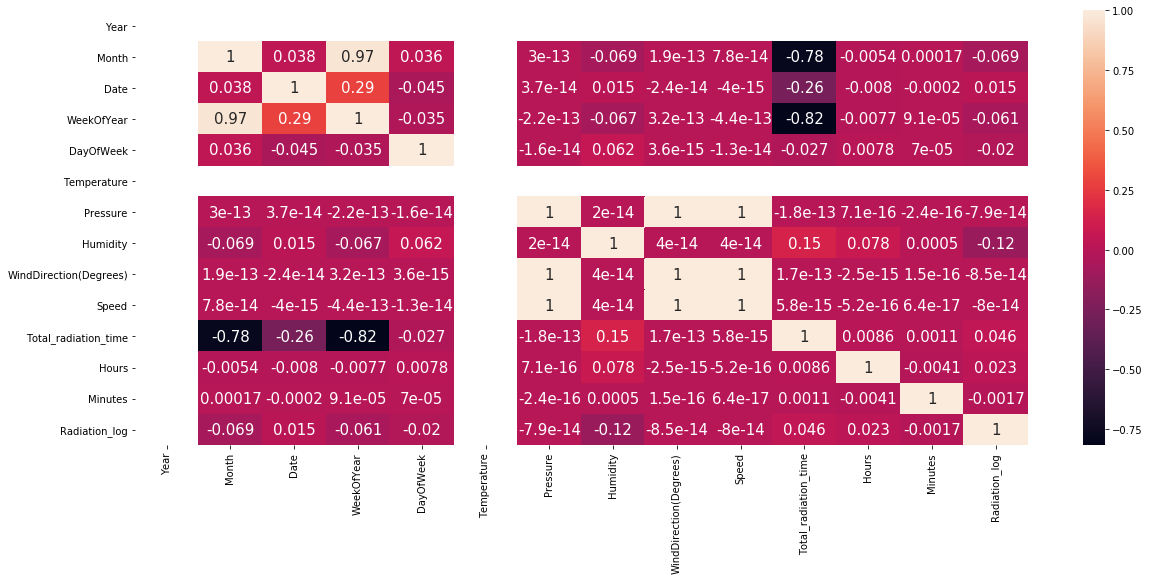

In [52]:
# New correlation matrix is 
plt.figure(figsize = (20,8))
sns.heatmap( solar2.corr(),annot =True, annot_kws = ({'size' : 15}))
plt.show()

In [53]:
# Splitting the data into numerical and categorical data
num=solar1.select_dtypes(include = np.number)
cat=solar1.select_dtypes(exclude=np.number)
num.head(2)

,Year,Month,Date,WeekOfYear,DayOfWeek,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Total_radiation_time,Hours,Minutes,Radiation_log
0,2016,9,29,39,4,55.0,30.46,59,179.31,7.87,12,23,55,0.792993
1,2016,9,29,39,4,55.0,30.46,58,179.31,7.87,12,23,50,0.792993


In [54]:
# Getting the dummies data for catgegorical data
cat = pd.get_dummies(cat)
cat.head(2)

,TimeSunRise_06:07:00,TimeSunRise_06:08:00,TimeSunRise_06:09:00,TimeSunRise_06:10:00,TimeSunRise_06:11:00,TimeSunRise_06:12:00,TimeSunRise_06:13:00,TimeSunRise_06:14:00,TimeSunRise_06:15:00,TimeSunRise_06:16:00,TimeSunRise_06:17:00,TimeSunRise_06:18:00,TimeSunRise_06:19:00,TimeSunRise_06:20:00,TimeSunRise_06:21:00,TimeSunRise_06:22:00,TimeSunRise_06:23:00,TimeSunRise_06:24:00,TimeSunRise_06:25:00,TimeSunRise_06:26:00,TimeSunRise_06:27:00,TimeSunRise_06:28:00,TimeSunRise_06:29:00,TimeSunRise_06:30:00,TimeSunRise_06:31:00,TimeSunRise_06:32:00,TimeSunRise_06:33:00,TimeSunRise_06:34:00,TimeSunRise_06:35:00,TimeSunRise_06:36:00,TimeSunRise_06:37:00,TimeSunRise_06:38:00,TimeSunRise_06:39:00,TimeSunRise_06:40:00,TimeSunRise_06:41:00,TimeSunRise_06:42:00,TimeSunRise_06:43:00,TimeSunRise_06:44:00,TimeSunRise_06:45:00,TimeSunRise_06:46:00,TimeSunRise_06:47:00,TimeSunRise_06:48:00,TimeSunRise_06:49:00,TimeSunRise_06:50:00,TimeSunRise_06:51:00,TimeSunRise_06:52:00,TimeSunRise_06:53:00,TimeSunRise_06:54:00,TimeSunRise_06:55:00,TimeSunRise_06:56:00,TimeSunRise_06:57:00,TimeSunSet_17:42:00,TimeSunSet_17:43:00,TimeSunSet_17:44:00,TimeSunSet_17:45:00,TimeSunSet_17:46:00,TimeSunSet_17:47:00,TimeSunSet_17:48:00,TimeSunSet_17:49:00,TimeSunSet_17:50:00,TimeSunSet_17:51:00,TimeSunSet_17:52:00,TimeSunSet_17:53:00,TimeSunSet_17:54:00,TimeSunSet_17:55:00,TimeSunSet_17:56:00,TimeSunSet_17:57:00,TimeSunSet_17:58:00,TimeSunSet_17:59:00,TimeSunSet_18:00:00,TimeSunSet_18:01:00,TimeSunSet_18:02:00,TimeSunSet_18:03:00,TimeSunSet_18:04:00,TimeSunSet_18:05:00,TimeSunSet_18:06:00,TimeSunSet_18:07:00,TimeSunSet_18:08:00,TimeSunSet_18:09:00,TimeSunSet_18:10:00,TimeSunSet_18:11:00,TimeSunSet_18:13:00,TimeSunSet_18:14:00,TimeSunSet_18:15:00,TimeSunSet_18:16:00,TimeSunSet_18:17:00,TimeSunSet_18:18:00,TimeSunSet_18:19:00,TimeSunSet_18:20:00,TimeSunSet_18:21:00,TimeSunSet_18:22:00,TimeSunSet_18:23:00,TimeSunSet_18:24:00,TimeSunSet_18:25:00,TimeSunSet_18:26:00,TimeSunSet_18:27:00,TimeSunSet_18:28:00,TimeSunSet_18:29:00,TimeSunSet_18:30:00,TimeSunSet_18:31:00,TimeSunSet_18:32:00,TimeSunSet_18:33:00,TimeSunSet_18:34:00,TimeSunSet_18:35:00,TimeSunSet_18:36:00,TimeSunSet_18:37:00,TimeSunSet_18:38:00
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# Concatinating the numerical and categorical data into the datframe. 
solar_final = pd.concat([num,cat],axis=1)

In [56]:
# Splitting the data into dependent and independent varibales
inp = solar_final.drop(['Radiation_log'],axis=1)
#inp = solar_final[["Year","Month","Date","WeekOfYear","DayOfWeek","Temperature","Pressure","Humidity","WindDirection(Degrees)","Speed","Total_radiation_time","Hours","Minutes"]]
out = solar_final['Radiation_log']

In [57]:
# Splitting the data into the final dataframe
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#xtrain , xtest, ytrain, ytest = train_test_split(inp, out, test_size = 0.3)
xtrain, xtest, ytrain, ytest = train_test_split(inp,out, test_size = 0.3, random_state = 0)
print('The shape of Xtrain' , xtrain.shape ,' and Ytrain', ytrain.shape)
print('The shape of Xtest' , xtest.shape ,' and Ytest', ytest.shape)

The shape of Xtrain (22880, 120)  and Ytrain (22880,)
The shape of Xtest (9806, 120)  and Ytest (9806,)


In [58]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regresor= LinearRegression()
regresor.fit(xtrain, ytrain)
regresor_pred = regresor.predict(xtest)

In [59]:
#Explained variance regression score
from sklearn.metrics import explained_variance_score
print('Explained Variance Score is :', explained_variance_score(ytest, regresor_pred))

Explained Variance Score is : 0.028557526062727878


In [60]:
#Mean absolute error regression loss
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error is :',mean_absolute_error(ytest, regresor_pred))

Mean Absolute Error is : 2.323384937540704


In [61]:
#Median absolute error regression loss¶
from sklearn.metrics import median_absolute_error
print('Median Absolute Error :', median_absolute_error(ytest, regresor_pred))

Median Absolute Error : 2.3333819400607356


In [62]:
#R^2 (coefficient of determination) regression score
from sklearn.metrics import r2_score
print('R2 Score is :',r2_score(ytest, regresor_pred))

R2 Score is : 0.028555677304154314


In [63]:
print('The overall accuracy score for training data is :' , regresor.score(xtrain,ytrain))
print('The overall accuracy score for testing data is :' , regresor.score(xtest,ytest))

The overall accuracy score for training data is : 0.03662137126168885
The overall accuracy score for testing data is : 0.028555677304154314


In [64]:
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score, mean_squared_error

In [65]:
rmse = np.sqrt(mean_squared_error(ytest,regresor_pred))
print('RMSE is :', rmse)

RMSE is : 2.468391080073075


In [66]:
accuracy = round(r2_score(ytest, regresor_pred)*100, 2)
print('Accuracy Score is :',accuracy)

Accuracy Score is : 2.86


In [67]:
#ols
import statsmodels.api as sm
olsmod = sm.OLS(out,inp)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:          Radiation_log   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     13.23
Date:                Thu, 17 Dec 2020   Prob (F-statistic):          1.33e-189
Time:                        11:58:34   Log-Likelihood:                -75754.
No. Observations:               32686   AIC:                         1.517e+05
Df Residuals:                   32594   BIC:                         1.525e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Year                    1.39

#### Verfiying the assumptions of Linear Regression.
* Linear Relationship
* Normality
* No autocorrelation
* Homoscadasticity

In [68]:
# Auto correlation
#vif treatment 
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [69]:
calc_vif(inp)

C:\Users\vikas\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\vikas\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Year,0.000000e+00
1,Month,inf
2,Date,inf
3,WeekOfYear,inf
4,DayOfWeek,inf
5,Temperature,0.000000e+00
6,Pressure,5.770183e-04
7,Humidity,2.500785e+00
8,WindDirection(Degrees),1.139782e-04
9,Speed,3.482106e-25


###### Inference :
- There is no such major autocorrelation between once we scale the data the condition number will also improve.

In [70]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(xtrain,ytrain)
y_pred = regr.predict(xtrain)

In [71]:
residuals = ytrain.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals : ",(mean_residuals))

Mean of Residuals :  0.006285090121505086


###### Inference : 
- Close to zero so all good here.

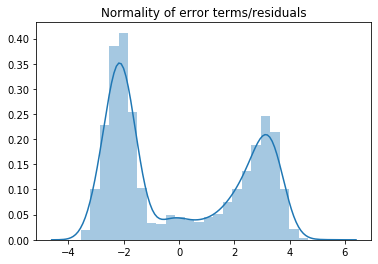

In [72]:
# Normality
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

##### Inference : 
- There are two peaks in the data which represents that there two modes in the dataset. Whereas the seemed to be right skewed and the second peak is smowhere normally distributed. 

###### Linear Relationship  
###### Inference :
* Apart from Temperature and Radiation  there is no major linear relation among the varibale as shown in the pairplot. 

In [73]:
# Feature Scaling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import r2_score,mean_squared_error

In [74]:
sc= StandardScaler()
scaled_xtrain = sc.fit_transform(xtrain)
scaled_xtest = sc.transform(xtest)

In [75]:
# To store the models performance
models = pd.DataFrame()

### 1. Linear Regression Model

In [76]:

lr = LinearRegression()
lr.fit(scaled_xtrain,ytrain)
lr_predict = lr.predict(scaled_xtest) 


In [77]:
lr_accuracy = round(r2_score(ytest,lr_predict)*100,2) 
lr_rmse = round(np.sqrt(mean_squared_error(ytest,lr_predict)),3)
print('Accuracy is :', lr_accuracy)
print('RMSE is :', lr_rmse)

Accuracy is : 1.82
RMSE is : 2.482


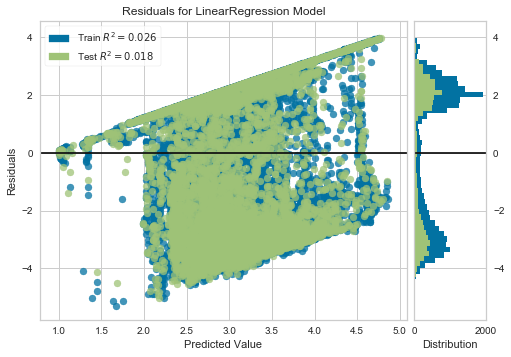

In [78]:
residual = ResidualsPlot(lr)
residual.fit(scaled_xtrain,ytrain)
residual.score(scaled_xtest,ytest)
residual.poof()
plt.show()

Inference :
* The residuals are unevenly distributed. This shows that a non-linear regressor might perform better on the dataset.
* Majority of the residuals seem to be negative, indicating that in most of the cases, our predictions are lower than actual answers
* Residuals are widely spread in both directions, this may indicate that our model is Underfitted to the dataset.
* LinearRegression model is a bad choice for this dataset.
* The dataset shows Heteroscedasticity.

In [79]:
print('The overall accuracy score for training data is :', round(lr.score(scaled_xtrain,ytrain),3))
print('The overall accuracy score for testing data is :', round(lr.score(scaled_xtest,ytest),3))

The overall accuracy score for training data is : 0.026
The overall accuracy score for testing data is : 0.018


In [80]:
models = models.append({'Model  ':'Linear Regression' ,'R2 Score' : lr_accuracy,'RMSE' : lr_rmse},ignore_index = True)


### 2. Ridge Regression

In [81]:
# Ridge Regression
from sklearn.linear_model import Ridge
rd = Ridge(alpha = 1)
rd.fit(xtrain,ytrain)
rd_predict = rd.predict(xtest)

In [82]:
rd_accuracy = round(r2_score(ytest,rd_predict)*100,2)
rd_rmse = round(np.sqrt(mean_squared_error(ytest,rd_predict)),3)
print('Accuracy :', rd_accuracy)
print('RMSE is :', rd_rmse)

Accuracy : 2.89
RMSE is : 2.468


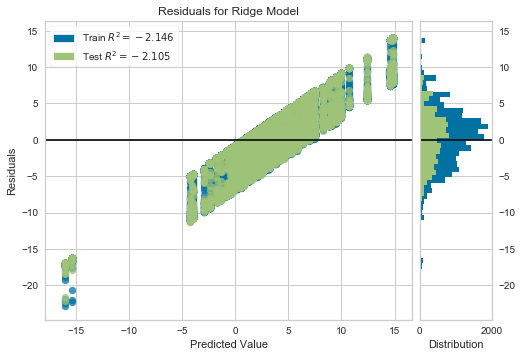

In [83]:
residual = ResidualsPlot(rd)
residual.fit(scaled_xtrain,ytrain)
residual.score(scaled_xtest,ytest)
residual.poof()
plt.show()

Inference :

* Majority of the residuals seem to be negative, indicating that in most of the cases, our predictions are lower than actual answers
* Residuals are widely spread in both directions, this may indicate that our model is Underfitted to the dataset.
* LinearRegression model is a bad choice for this dataset.

In [84]:
print('The overall accuracy score for training data is :', round(rd.score(scaled_xtrain,ytrain),3))
print('The overall accuracy score for testing data is :', round(rd.score(scaled_xtest,ytest),3))

The overall accuracy score for training data is : -2.146
The overall accuracy score for testing data is : -2.105


In [85]:
models = models.append({'Model  ':'Ridge Regression' ,'R2 Score' : rd_accuracy,'RMSE' : rd_rmse},ignore_index = True)

models

,Model,R2 Score,RMSE
0,Linear Regression,1.82,2.482
1,Ridge Regression,2.89,2.468


### 3. Descision Tree Regressor

In [86]:

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion = 'mse')
dt.fit(scaled_xtrain,ytrain)
dt_predict = dt.predict(scaled_xtest)

In [87]:
dt_accuracy = round(r2_score(ytest,dt_predict)*100,2)
dt_rmse = round(np.sqrt(mean_squared_error(ytest,dt_predict)),3)
print('Accuracy :', dt_accuracy)
print('RMSE is :', dt_rmse)

Accuracy : 98.77
RMSE is : 0.278


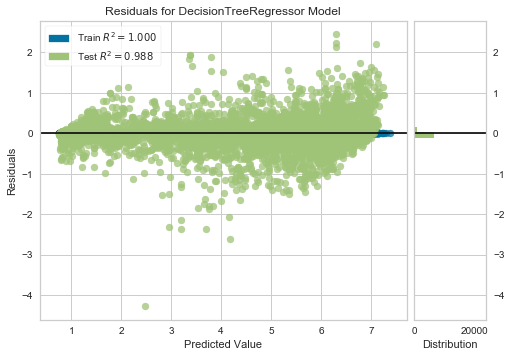

In [88]:
residual = ResidualsPlot(dt)
residual.fit(scaled_xtrain,ytrain)
residual.score(scaled_xtest,ytest)
residual.poof()
plt.show()

## Inference:

* The residuals for training data is evenly distributed but for the testing data they are randomly distributed.
* Test residuals are spread in both directions.


In [89]:
print('The overall accuracy score for training data is :', round(dt.score(scaled_xtrain,ytrain),3))
print('The overall accuracy score for testing data is :', round(dt.score(scaled_xtest,ytest),3))

The overall accuracy score for training data is : 1.0
The overall accuracy score for testing data is : 0.988


In [90]:
models = models.append({'Model  ':'Decision Tree Regressor' ,'R2 Score' : dt_accuracy,'RMSE' : dt_rmse},ignore_index = True)

### 4. KNN Regressor

In [91]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(scaled_xtrain,ytrain)
knn_predict = knn.predict(scaled_xtest)

In [92]:
knn_accuracy = round(r2_score(ytest,knn_predict)*100,2)
knn_rmse = round(np.sqrt(mean_squared_error(ytest,knn_predict)),3)
print('Accuracy :', knn_accuracy)
print('RMSE is :', knn_rmse)

Accuracy : 92.36
RMSE is : 0.692


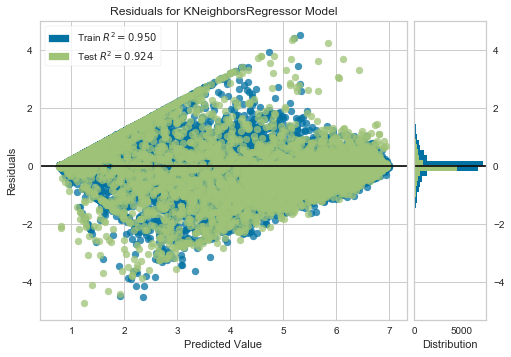

In [93]:
residual = ResidualsPlot(knn)
residual.fit(scaled_xtrain,ytrain)
residual.score(scaled_xtest,ytest)
residual.poof()
plt.show()

## Inference :
* The residuals are unevenly distributed. This shows that a non-linear regressor might perform better on the dataset.
* Residuals are widely spread in both directions, this may indicate that our model is Underfitted to the dataset.
* Test Residuals are negative in the first half of the predictions but are positive in the second half of test predictions.

In [94]:
print('The overall accuracy score for training data is :', round(knn.score(scaled_xtrain,ytrain),3))
print('The overall accuracy score for testing data is :', round(knn.score(scaled_xtest,ytest),3))

The overall accuracy score for training data is : 0.95
The overall accuracy score for testing data is : 0.924


In [95]:
models = models.append({'Model  ':'K Neighbors Regressor' ,'R2 Score' : knn_accuracy,'RMSE' : knn_rmse},ignore_index = True)

### 4. Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500)
rf.fit(scaled_xtrain,ytrain)
rf_predict = rf.predict(scaled_xtest)

In [97]:
print('The overall accuracy score for training data is :', round(rf.score(scaled_xtrain,ytrain),3))
print('The overall accuracy score for testing data is :', round(rf.score(scaled_xtest,ytest),3))

The overall accuracy score for training data is : 0.999
The overall accuracy score for testing data is : 0.993


In [98]:
rf_accuracy = round(r2_score(ytest,rf_predict)*100,2)
rf_rmse = round(np.sqrt(mean_squared_error(ytest,rf_predict)),3)
print('Accuracy :', rf_accuracy)
print('RMSE is :', rf_rmse)

Accuracy : 99.26
RMSE is : 0.215


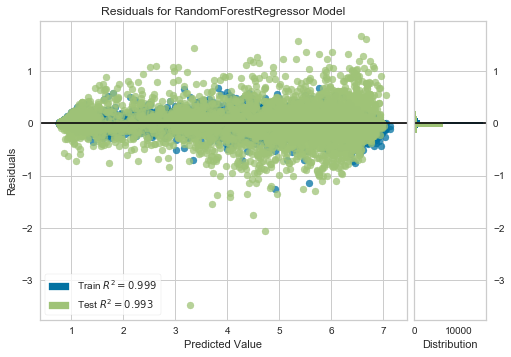

In [99]:
residual = ResidualsPlot(rf)
residual.fit(scaled_xtrain,ytrain)
residual.score(scaled_xtest,ytest)
residual.poof()
plt.show()

## Inference : 
* The model is performing really well on the Train dataset
* The residuals are not randomly distributed. This shows that a non-linear regressor such as this one is a good choice for this dataset
* Majority of the residuals are around the 0 line, indicating that the model is making lessor Errors in Prediction
* The residuals on Test dataset are negative in the mid range of predictions, but positive when the predicted value is Higher


In [100]:
models = models.append({'Model  ':'Random Forest Regressor' ,'R2 Score' : rf_accuracy,'RMSE' : rf_rmse},ignore_index = True)

In [104]:
models.sort_values(by=['R2 Score'],ascending=False)

,Model,R2 Score,RMSE
4,Random Forest Regressor,99.26,0.215
2,Decision Tree Regressor,98.77,0.278
3,K Neighbors Regressor,92.36,0.692
1,Ridge Regression,2.89,2.468
0,Linear Regression,1.82,2.482


In [102]:
rf_predict

array([6.06522883, 5.85986687, 6.6339292 , ..., 0.80384751, 0.79792713,
       0.7971367 ])

## Inference: 
* Among all the models Random Forest Regressor has the Highest r2 score and Lowest RMSE value. 